In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel('Superstore_USA.xlsx')

In [30]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Order Year              0
dtype: int64

In [6]:

dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace=True)


/var/folders/ml/3qcdpgn14mx_m98r9f7p11hh0000gn/T/ipykernel_35723/3214666454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace=True)


# Data Cleaning

In [7]:
mean = dataset['Product Base Margin'].mean()
dataset['Product Base Margin'].fillna(mean, inplace=True)


/var/folders/ml/3qcdpgn14mx_m98r9f7p11hh0000gn/T/ipykernel_35723/2016983415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(mean, inplace=True)


In [8]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

# Order Priority

In [9]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [10]:
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical ', 'Critical')

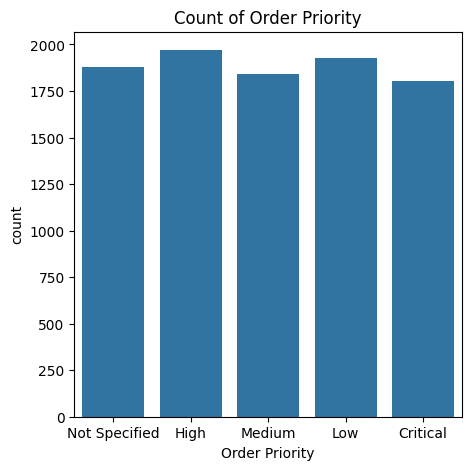

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='Order Priority', data=dataset)
plt.title('Count of Order Priority')
plt.savefig('Count of Order Priority')
plt.show()

# Shiping Mode

In [12]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [13]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

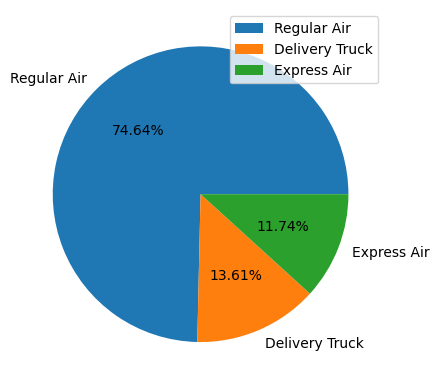

<Figure size 640x480 with 0 Axes>

In [58]:
plt.pie(y, labels=x, autopct="%.02f%%")
plt.legend(loc=1)
plt.show()
plt.savefig('Shipping Mode')

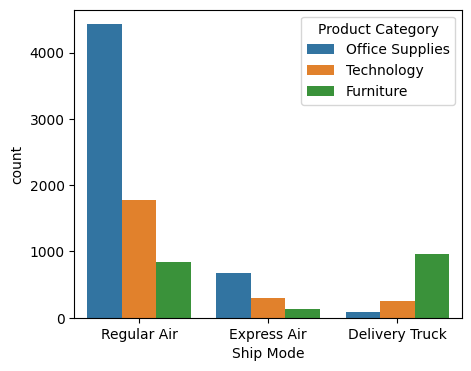

<Figure size 640x480 with 0 Axes>

In [61]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode", data=dataset, hue="Product Category")
plt.show()
plt.savefig('Catagorywise Shipping mode')

# Customer Segment

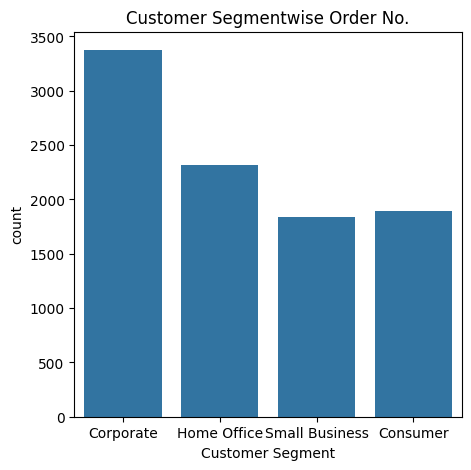

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(x='Customer Segment', data=dataset)
plt.title('Customer Segmentwise Order No.')
plt.show()
plt.savefig('Customer Segmentwise Order No.')

# Product Catagory

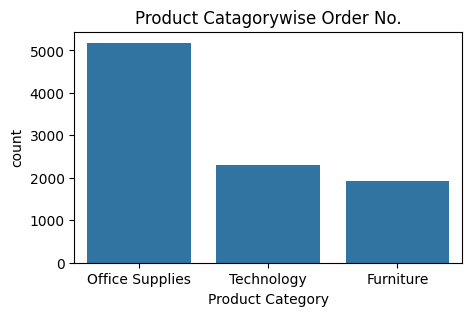

<Figure size 640x480 with 0 Axes>

In [59]:
plt.figure(figsize=(5,3))
sns.countplot(x='Product Category', data=dataset)
plt.title('Product Catagorywise Order No.')
plt.show()
plt.savefig('Product Catagorywise Order No.')

# Sub Catagorywise Sales in each catagory

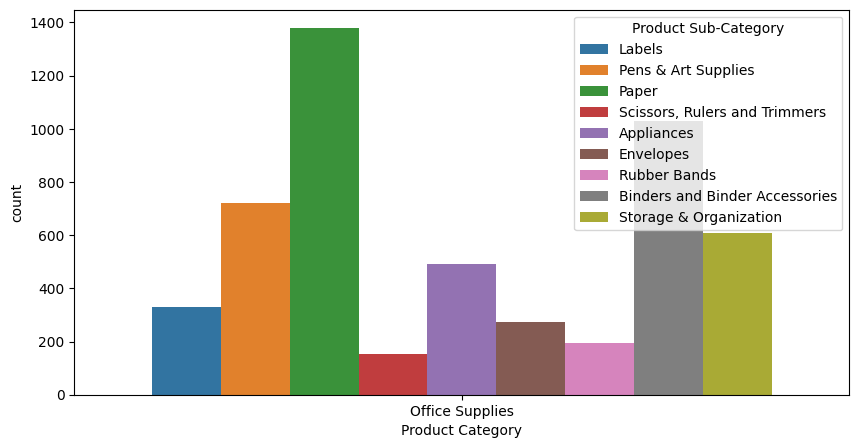

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x="Product Category", data=dataset[dataset["Product Category"] == "Office Supplies"], hue="Product Sub-Category")
plt.show()
plt.savefig('Sub-catagory wise')

# Orders Per Year

In [63]:
dataset['Order Year'] = dataset['Order Date'].dt.year

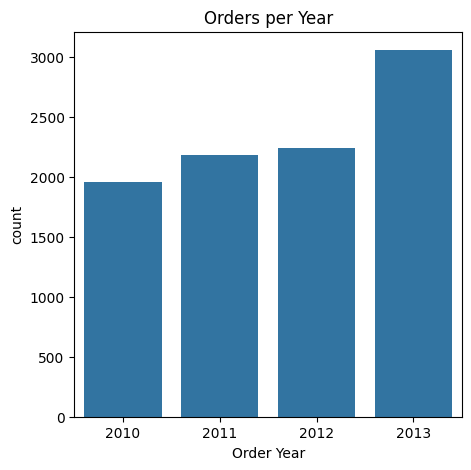

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure(figsize=(5,5))
sns.countplot(x='Order Year', data=dataset)
plt.title('Orders per Year')
plt.show()
plt.savefig('Orders per Year')

In [33]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

# Catagorywise Profit

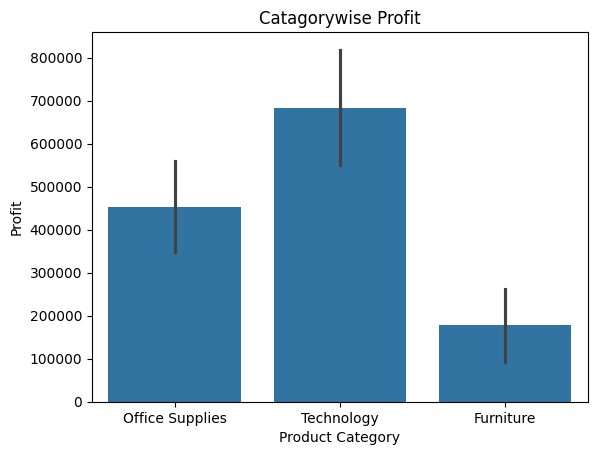

<Figure size 640x480 with 0 Axes>

In [73]:
sns.barplot(x='Product Category', y='Profit', data=dataset, estimator='sum')
plt.title('Catagorywise Profit')
plt.show()
plt.savefig('Catagorywise Profit')

# Statewise Sales

In [69]:
plt.figure(figsize=(10,5))
# sns.countplot(x='State or Province', data=dataset)
# plt.show()
dataset['State or Province'].value_counts().head()


State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

<Figure size 1000x500 with 0 Axes>

# Product Containerwise Orders

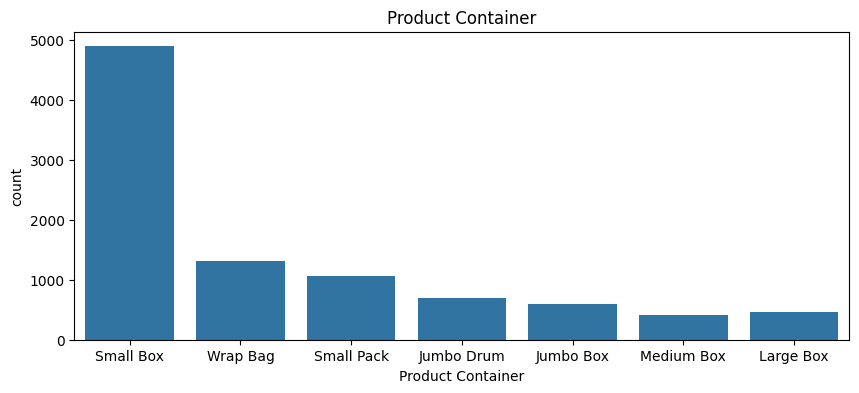

<Figure size 640x480 with 0 Axes>

In [74]:
# dataset['Product Container'].value_counts()
plt.figure(figsize=(10,4))
sns.countplot(x='Product Container', data=dataset)
plt.title('Product Container')
plt.show()
plt.savefig('Product Container')

# Catagorywise Profit Margin

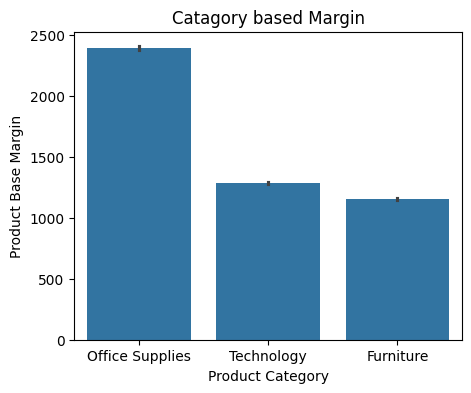

In [76]:
plt.figure(figsize=(5,4))
plt.title('Catagory based Margin')
sns.barplot(x='Product Category', y='Product Base Margin', data=dataset, estimator='sum')
plt.savefig('Catagory based Margin')